Which borough has the highset number of arrest of African-Americans?

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,9/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155502,222884924,1/10/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,B,46,0,45-64,M,BLACK,1011432,247605,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035)
155503,223918625,2/3/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,67,0,18-24,M,BLACK,1004940,180941,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005)
155504,224323770,2/13/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,121,0,45-64,M,BLACK,942825,166367,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074)
155505,222599533,1/4/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,F,K,73,0,25-44,M,BLACK,1007524,188555,40.684194,-73.916085,POINT (-73.91608474599997 40.684194302000044)


Next I want to clean the data by reviewing counts of missing fields, deleting columns that aren't relevent to the question above and renaming columns.

In [4]:
df.isnull().sum()

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                        14
PD_DESC                      69
KY_CD                        69
OFNS_DESC                    69
LAW_CODE                      0
LAW_CAT_CD                  530
ARREST_BORO                   0
ARREST_PRECINCT               0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     1
New Georeferenced Column      1
dtype: int64

Since both the race column and the precinct columns are not missing any information I decided not to delete any rows or change the data w/in the fields.   

In [131]:
df2=df[['ARREST_KEY','ARREST_DATE','PERP_RACE','AGE_GROUP','OFNS_DESC','ARREST_BORO','ARREST_PRECINCT']]
df2

,ARREST_KEY,ARREST_DATE,PERP_RACE,AGE_GROUP,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT
0,238013474,12/18/2021,BLACK,18-24,RAPE,Q,105
1,236943583,11/25/2021,BLACK,25-44,ARSON,K,69
2,234938876,10/14/2021,WHITE,25-44,SEX CRIMES,K,61
3,234788259,10/11/2021,BLACK,18-24,ARSON,B,42
4,234188790,9/28/2021,BLACK,25-44,NaN,B,44
...,...,...,...,...,...,...,...
155502,222884924,1/10/2021,BLACK,45-64,ROBBERY,B,46
155503,223918625,2/3/2021,BLACK,18-24,DANGEROUS WEAPONS,K,67
155504,224323770,2/13/2021,BLACK,45-64,ASSAULT 3 & RELATED OFFENSES,S,121
155505,222599533,1/4/2021,BLACK,25-44,DANGEROUS WEAPONS,K,73


In [132]:
df2['PERP_RACE'].unique()


array(['BLACK', 'WHITE', 'WHITE HISPANIC', 'ASIAN / PACIFIC ISLANDER',
       'AMERICAN INDIAN/ALASKAN NATIVE', 'BLACK HISPANIC', 'UNKNOWN'],
      dtype=object)

In [133]:
df2['ARREST_PRECINCT'].unique()

array([105,  69,  61,  42,  44,  84, 106,  41, 114,  25, 112,  77, 113,
        75,   5,  19,  40,  49,  66,  18,   9,  13,   7,  30,  28,  50,
       108,  20,  43,  76, 120,  68, 121,  52,  14, 115,  23,  32, 110,
        47,  79,  17, 103,  62,  70, 104,   6,  48,  81,  72, 111,  88,
       102,  10, 107,  60,  73,  34,  45,  46, 101,  26, 100,  90, 109,
        71,  78, 122,  67,  33,   1,  83,  94, 123,  24,  63,  22])

In [134]:
df2['ARREST_BORO'].unique()

array(['Q', 'K', 'B', 'M', 'S'], dtype=object)

In [135]:
df3=df2.replace({'ARREST_BORO':{'Q':'Queens','K':'Brooklyn','B':'Bronx','M':'Manhattan','S':'Staten Island'}})
df3


,ARREST_KEY,ARREST_DATE,PERP_RACE,AGE_GROUP,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT
0,238013474,12/18/2021,BLACK,18-24,RAPE,Queens,105
1,236943583,11/25/2021,BLACK,25-44,ARSON,Brooklyn,69
2,234938876,10/14/2021,WHITE,25-44,SEX CRIMES,Brooklyn,61
3,234788259,10/11/2021,BLACK,18-24,ARSON,Bronx,42
4,234188790,9/28/2021,BLACK,25-44,NaN,Bronx,44
...,...,...,...,...,...,...,...
155502,222884924,1/10/2021,BLACK,45-64,ROBBERY,Bronx,46
155503,223918625,2/3/2021,BLACK,18-24,DANGEROUS WEAPONS,Brooklyn,67
155504,224323770,2/13/2021,BLACK,45-64,ASSAULT 3 & RELATED OFFENSES,Staten Island,121
155505,222599533,1/4/2021,BLACK,25-44,DANGEROUS WEAPONS,Brooklyn,73


Running the unique values above allows me to get determine whether group by race (7) and/or precints (77) will provide useful visual tables. 

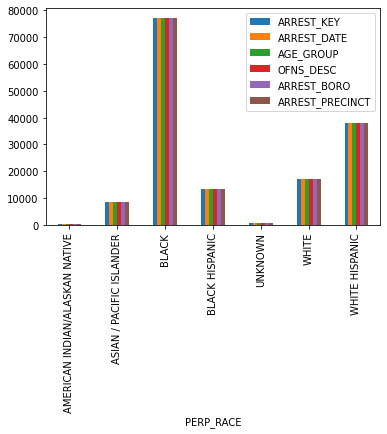

In [136]:
df3.groupby(['PERP_RACE']).count().plot(kind="bar")

Already with the bar graph above the data shows Black people have a higher rate of arrest compared to the other races in NY City. 

In [137]:
df3.groupby(['ARREST_BORO'])['PERP_RACE'].count()

ARREST_BORO
Bronx            34018
Brooklyn         41550
Manhattan        39677
Queens           33051
Staten Island     7211
Name: PERP_RACE, dtype: int64

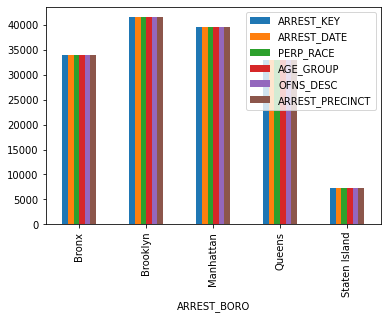

In [138]:
df3.groupby(['ARREST_BORO']).count().plot(kind="bar")

Pulling additional information from https://worldpopulationreview.com/boroughs/brooklyn-population and https://worldpopulationreview.com/boroughs/manhattan-population I wanted to get an idea of what is the overall population  of Brooklyn & Manhattan based on race, which happens to be the two boroughs with the highest number of overall arrest. 

In [139]:
df4=pd.read_csv('/content/Brooklyn Population by Race.csv')
df4


,Race,Population,Percentage
0,White,1132426,0.4372
1,Black or African American,833683,0.3219
2,Asian,307081,0.1186
3,Some Other Race,225162,0.0869
4,Two or More Races,81786,0.0316
5,American Indian and Alaska Native,8604,0.0033
6,Native Hawaiian and Other Pacific Islander,1232,0.0005


In [140]:
df4['Race'].unique()

array(['White', 'Black or African American', 'Asian', 'Some Other Race',
       'Two or More Races', 'American Indian and Alaska Native',
       'Native Hawaiian and Other Pacific Islander'], dtype=object)

In [101]:
df4['Percentage'].unique()

array([0.4372, 0.3219, 0.1186, 0.0869, 0.0316, 0.0033, 0.0005])

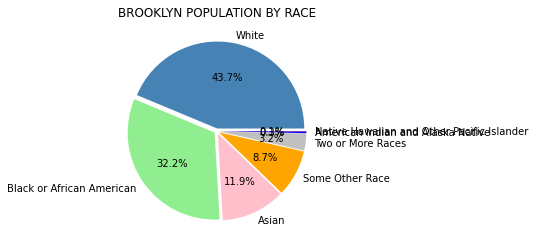

In [141]:
y=np.array([0.4372, 0.3219, 0.1186, 0.0869, 0.0316, 0.0033, 0.0005])
my_labels = 'White', 'Black or African American', 'Asian', 'Some Other Race','Two or More Races', 'American Indian and Alaska Native','Native Hawaiian and Other Pacific Islander'
colors = ['steelblue','lightgreen','pink','orange','silver','blue','red']
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,)
plt.title('BROOKLYN POPULATION BY RACE')
plt.pie(y, labels=my_labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.show()


Manhattan Info Below

In [142]:
df5=pd.read_csv('/content/Manhattan Population by Race.csv')
df5

,Race,Population,Percentage
0,White,922033,0.5650
1,Black or African American,240993,0.1477
2,Asian,198833,0.1218
3,Some Other Race,188400,0.1154
4,Two or More Races,74668,0.0458
5,American Indian and Alaska Native,6178,0.0038
6,Native Hawaiian and Other Pacific Islander,888,0.0005


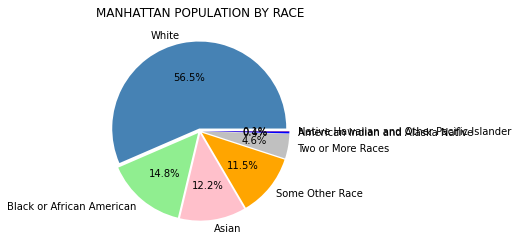

In [143]:
y=np.array([0.5650, 0.1477, 0.1218, 0.1154, 0.0458, 0.0038,0.0005])
my_labels = 'White', 'Black or African American', 'Asian', 'Some Other Race','Two or More Races', 'American Indian and Alaska Native','Native Hawaiian and Other Pacific Islander'
colors = ['steelblue','lightgreen','pink','orange','silver','blue','red']
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,)
plt.title('MANHATTAN POPULATION BY RACE')
plt.pie(y, labels=my_labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.show()

In [144]:
df6=pd.read_csv('/content/New York City Total Population.csv')
df6

,Race,Population,Percentage
0,White,3597221,0.4273
1,Black or African American,2046878,0.2431
2,Some Other Race,1241618,0.1475
3,Asian,1186606,0.1409
4,Two or More Races,305948,0.0363
5,American Indian and Alaska Native,36250,0.0043
6,Native Hawaiian and Other Pacific Islander,4802,0.0006


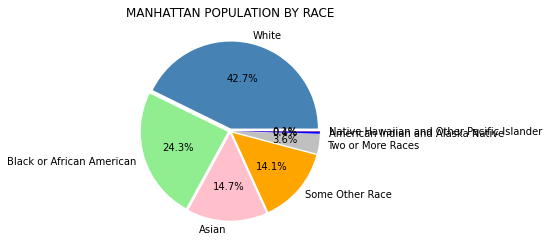

In [145]:
y=np.array([0.4273, 0.2431, 0.1475, 0.1409, 0.0363, 0.0043, 0.0006])
my_labels = 'White', 'Black or African American', 'Asian', 'Some Other Race','Two or More Races', 'American Indian and Alaska Native','Native Hawaiian and Other Pacific Islander'
colors = ['steelblue','lightgreen','pink','orange','silver','blue','red']
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,)
plt.title('MANHATTAN POPULATION BY RACE')
plt.pie(y, labels=my_labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.show()

With the data from the World Population Review showing a higher precentage of the population in Brooklyn & Manhattan being *white*, it could have been assumed that *white* would also be the higher percentage of arrest, however as previously displayed that is not the case. The earlier bar chart shows black has being 49% of the arrested (155,507/77,133).

Next is to review the volumn of arrest of black people based on borough.

In [146]:
blk=df3['PERP_RACE']=='BLACK'
df_blk=df3[blk]
df_blk.shape

(77133, 7)

In [148]:
df_blk.groupby(['ARREST_BORO'])['ARREST_PRECINCT'].count()

ARREST_BORO
Bronx            16428
Brooklyn         24642
Manhattan        20035
Queens           12981
Staten Island     3047
Name: ARREST_PRECINCT, dtype: int64

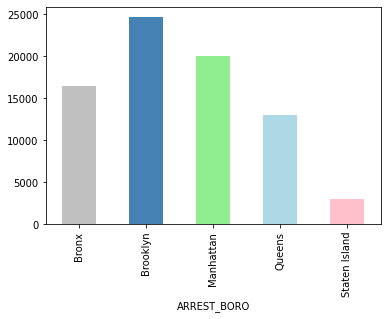

In [151]:
df_blk.groupby(['ARREST_BORO'])['ARREST_PRECINCT'].count().plot(kind="bar", color=['silver','steelblue','lightgreen','lightblue','pink'])

In conclusion based on the information provided on the data and additional information from World Population it appears that black people are more likely to be arrested in Brooklyn & Mantattan even though they make up less of the population in both boroughs. 